# data visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
sns.set(font_scale=1.2)
sns.set_style('ticks')
sns.set_palette('dark')

import data and remove categorical variables

In [2]:
df_raw = pd.read_csv("~/GitHub/3pt-shooting/data/preprocessed.csv")

char = df_raw.select_dtypes(include=['object']).columns
df_char = df_raw[char]
df = df_raw.drop(columns = char)

plot distributions of data 


In [3]:
print('Target mean: {0:0.3f}'.format(np.mean(df['next_3P%'])))
print('Target STD: {0:0.4f}'.format(np.std(df['next_3P%'])))

Target mean: 0.361
Target STD: 0.0418


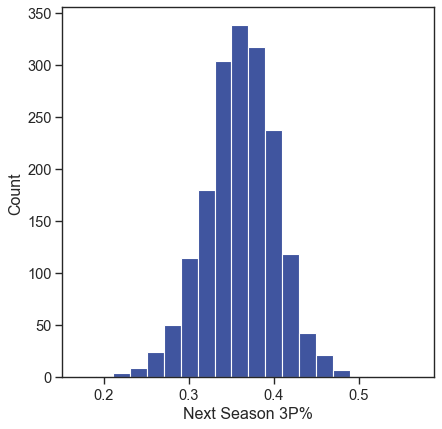

In [4]:
fig, axs = plt.subplots(figsize=(6, 6), dpi=80)
sns.histplot(ax=axs, data=df, x='next_3P%', bins=20)
axs.set_xlabel('Next Season 3P%')
axs.set_ylabel('Count')
plt.show()


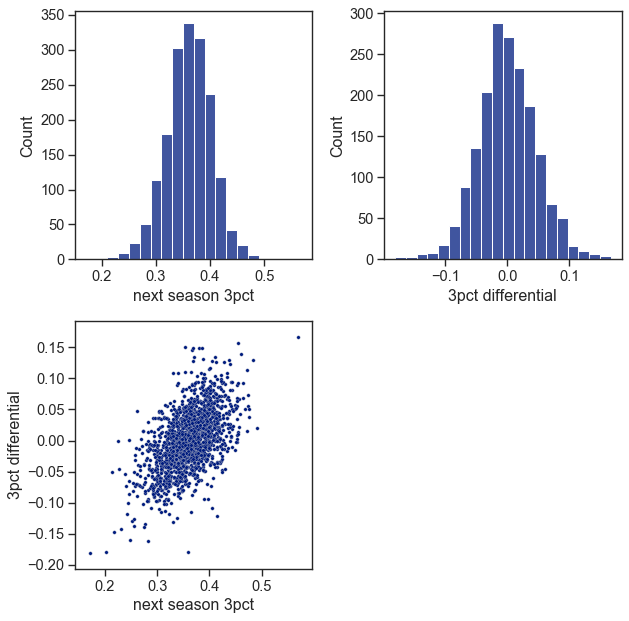

In [5]:
fig, axs = plt.subplots(2,2, figsize=(8, 8), dpi=80)
sns.histplot(ax=axs[0,0], data=df, x='next_3P%', bins=20,);axs[0,0].set_xlabel('next season 3pct')
sns.histplot(ax=axs[0,1], data=df, x='3pt_dif', bins=20);axs[0,1].set_xlabel('3pct differential')
sns.scatterplot(ax=axs[1,0], data=df, x='next_3P%', y='3pt_dif',edgecolor="lightgrey", s=10)
axs[1,0].set_xlabel('next season 3pct');axs[1,0].set_ylabel('3pct differential')
fig.delaxes(axs.flatten()[3])
fig.tight_layout()
plt.show()


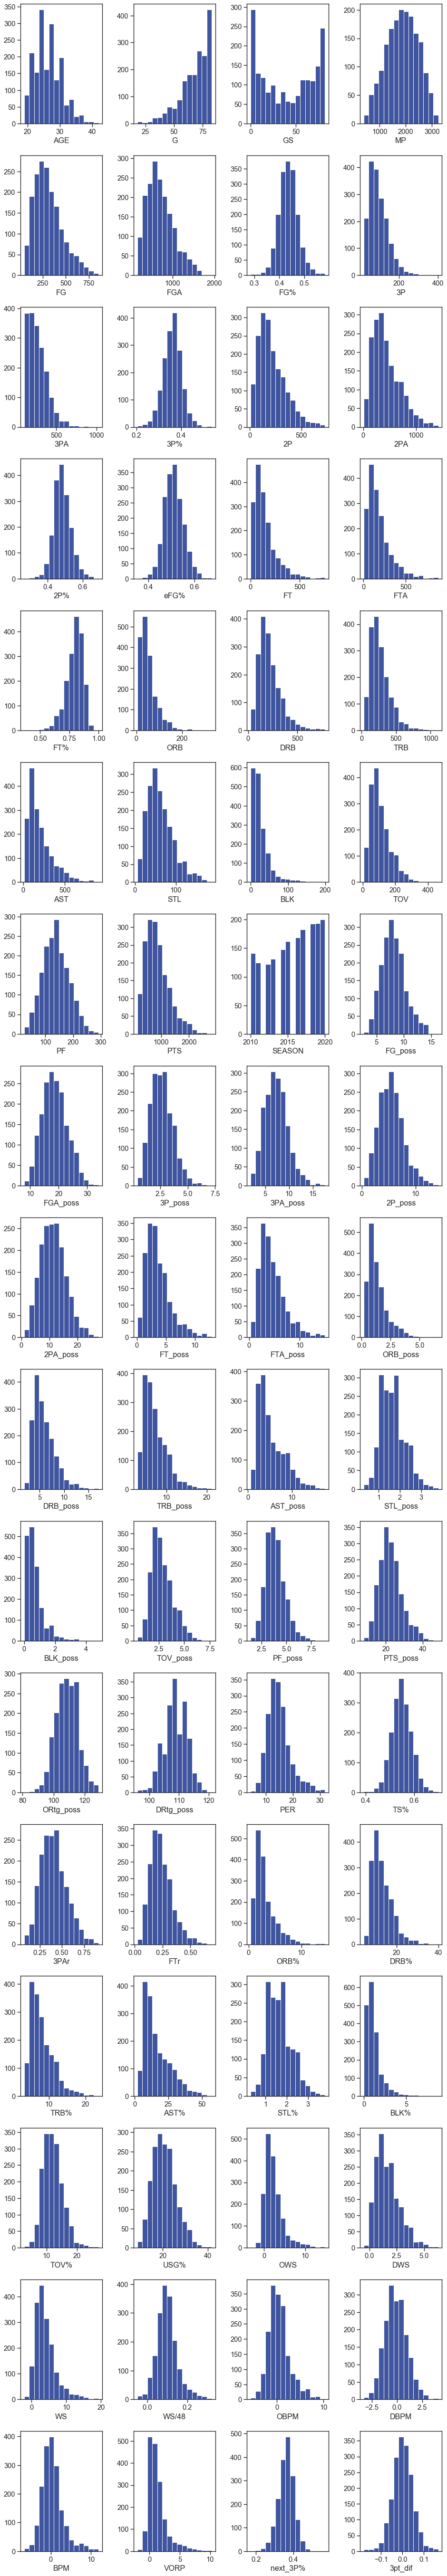

In [6]:
fig, axs = plt.subplots(17,4, figsize=(12, 68), dpi=80)

for i, col in enumerate(df.columns):

    x_i = i % 4
    y_i = int(i/4)

    sns.histplot(ax=axs[y_i,x_i], data=df, x=col, bins=15)
    axs[y_i,x_i].set_xlabel(col)
    axs[y_i,x_i].set_ylabel('')

fig.tight_layout()
plt.show()

Feature a few distributions to illustrate skew

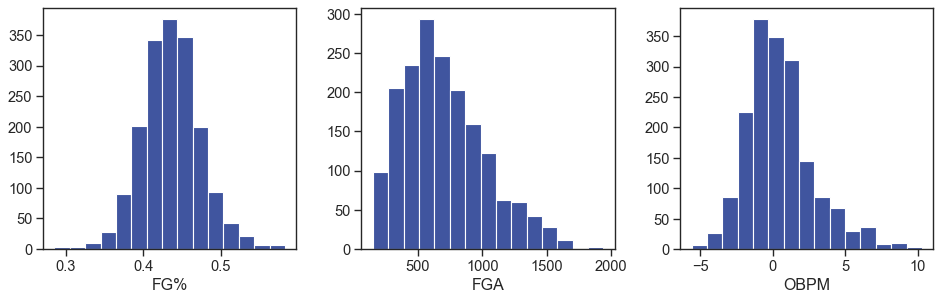

In [7]:
df_small = df[['FG%', 'FGA', 'OBPM']]

fig, axs = plt.subplots(1,3, figsize=(12, 4), dpi=80)

for i, col in enumerate(df_small.columns):

    x_i = i 

    sns.histplot(ax=axs[i], data=df_small, x=col, bins=15)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('')

fig.tight_layout()
plt.show()


Cube root features for normality

In [8]:
# don't transform these features
not_trans = ['next_3P%', '3pt_dif', 'G','GS', 'MP', 'FG%', '3P%', 'eFG%', 'ORtg_poss' , 'DRtg_poss', 'TS%', 'DBPM','SEASON']

df_not_trans = df[not_trans]

df_trans = df.drop(columns = not_trans)

for col in df_trans.columns:

    df_trans[col] = df_trans[col]**(1/3)

display transformations

In [9]:
df_trans.shape

(1768, 55)

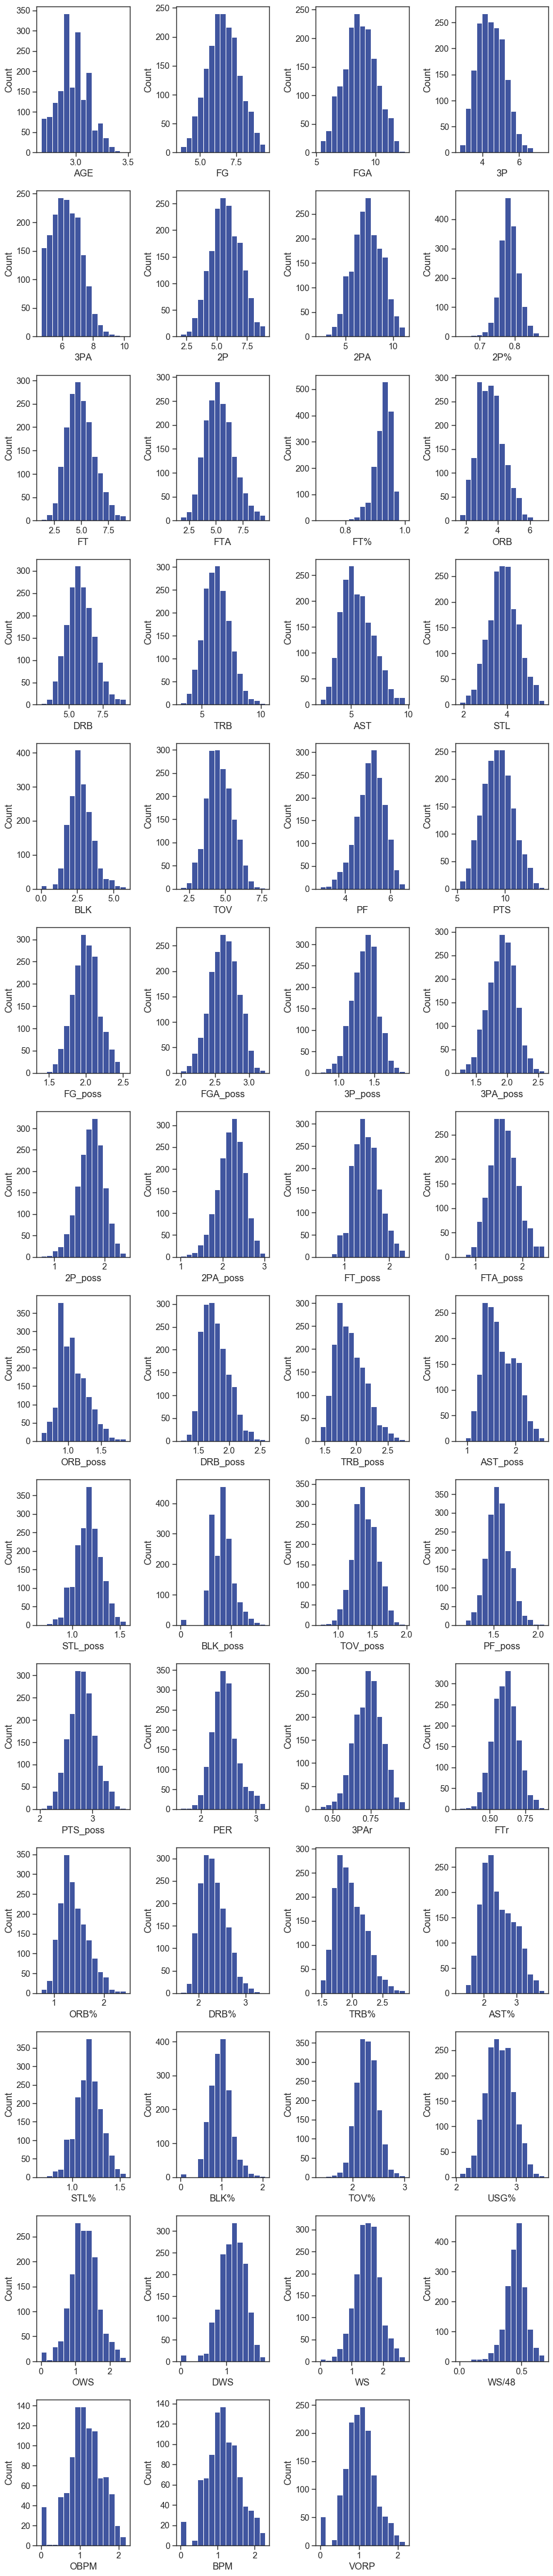

In [10]:
fig, axs = plt.subplots(14,4, figsize=(12, 55), dpi=80)

for i, col in enumerate(df_trans.columns):

    x_i = i % 4
    y_i = int(i/4)
    sns.histplot(ax=axs[y_i,x_i], data=df_trans, x=col, bins=15)
    axs[y_i,x_i].set_xlabel(col)

fig.delaxes(axs.flatten()[55])
fig.tight_layout()
plt.show()

Plot some smaller set of transformed distributions again

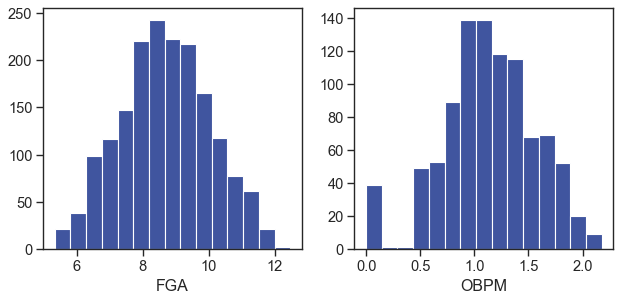

In [11]:
df_small_trans = df_trans[[ 'FGA', 'OBPM']]

fig, axs = plt.subplots(1,2, figsize=(8, 4), dpi=80)

for i, col in enumerate(df_small_trans.columns):

    x_i = i 

    sns.histplot(ax=axs[i], data=df_small_trans, x=col, bins=15)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('')

fig.tight_layout()
plt.show()

plot against target

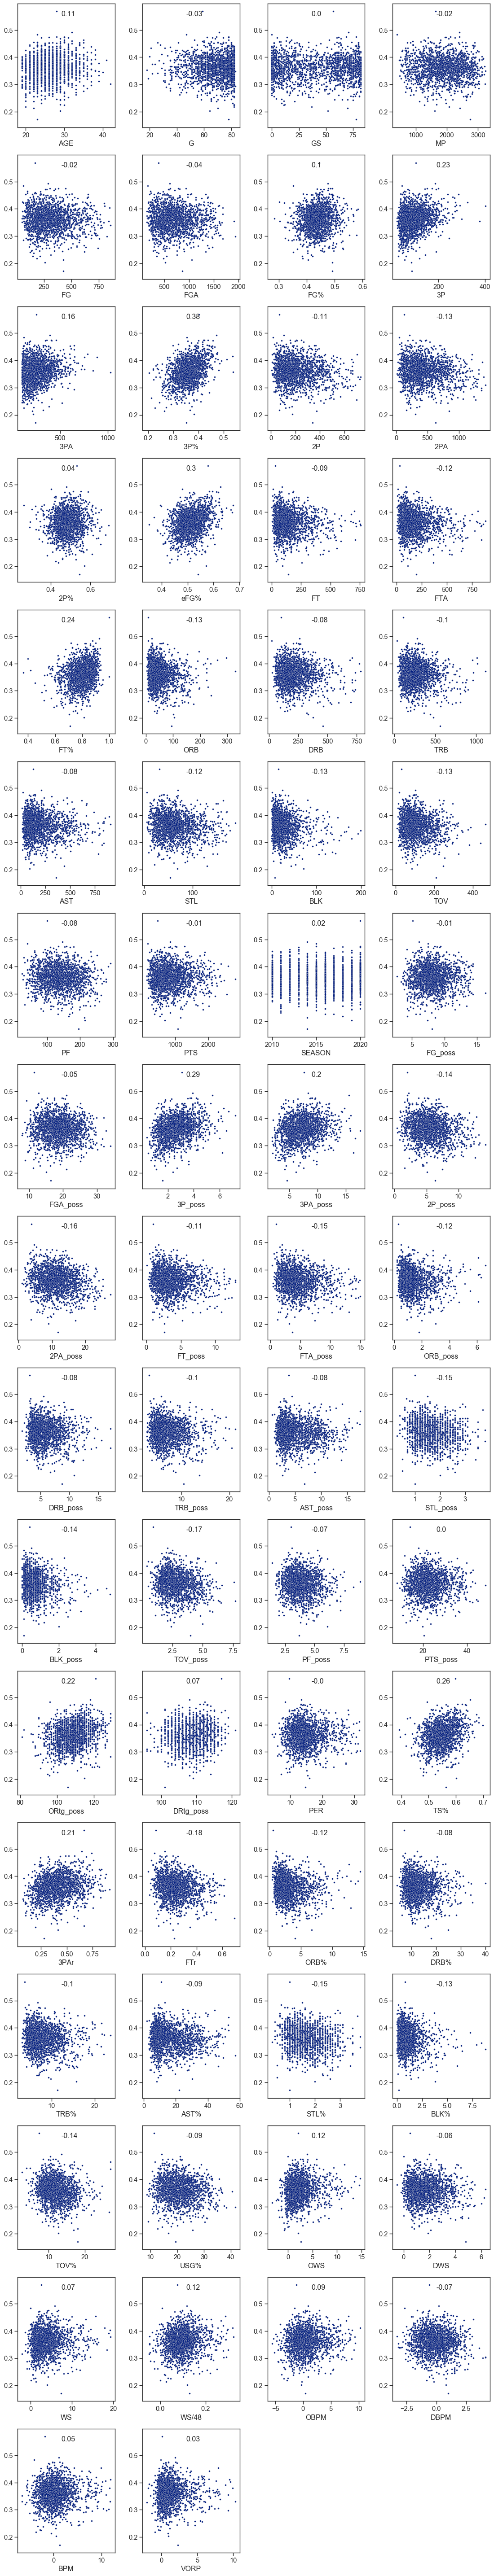

FT%: 0.24
3P_poss: 0.29
3P%: 0.38
eFG%: 0.3
TS%: 0.26


In [12]:
# plot against next seasons percentage

fig, axs = plt.subplots(17,4, figsize=(14, 72), dpi=80)

cors = list()
cols = list()

for i, col in enumerate(df.columns):

    x_i = i % 4
    y_i = int(i/4)

    x = df[col][np.isfinite(df[col])]
    y = df['next_3P%'][np.isfinite(df[col])]


    R = pearsonr(x, y)[0]
    cor = round(R, 2)

    if i < 5 and col!='3pt_dif' and col!='next_3P%':
        cors.append(cor)
        cols.append(col)
    
    
    elif col!='3pt_dif' and col!='next_3P%':
        val = min(np.abs(cors))

        if abs(cor) > val:
            ind = list(np.abs(cors)).index(val)
            cors[ind] = cor
            cols[ind] = col

    sns.scatterplot(ax=axs[y_i,x_i], data=df, x=col,y='next_3P%',edgecolor="lightgrey", s=10)
    axs[y_i,x_i].set_xlabel(col);axs[y_i,x_i].set_ylabel('')
    axs[y_i,x_i].text(0.45, 0.9, cor, transform=axs[y_i,x_i].transAxes)

fig.delaxes(axs.flatten()[66])
fig.delaxes(axs.flatten()[67])
fig.tight_layout()
plt.show()

for i in range(len(cols)):
    print('%s: %s' % (cols[i], cors[i]))

Plot the top 5 features correlated with the target

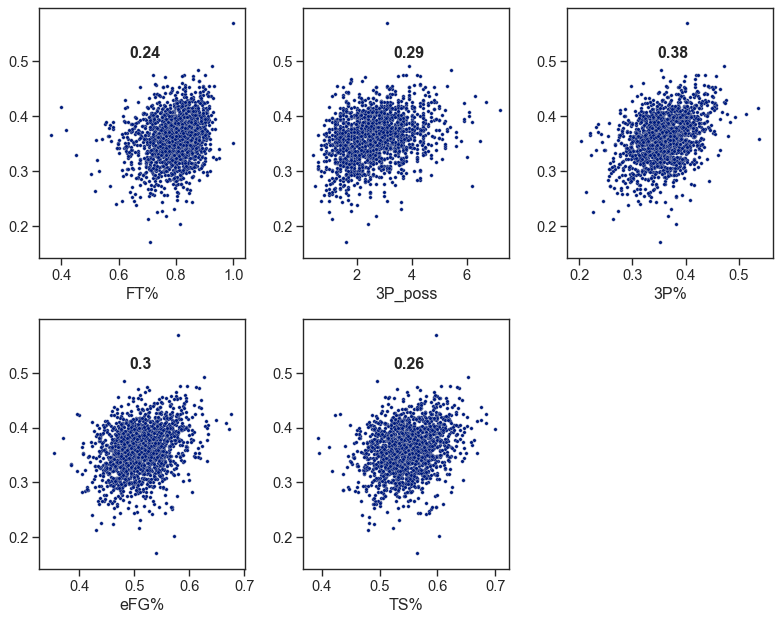

In [24]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8), dpi=80)

for i in range(len(cols)):
    # print('%s: %s' % (cols[i], cors[i]))

    col = cols[i]
    cor = cors[i]

    x_i = i % 3
    y_i = int(i/3)    

    sns.scatterplot(ax=axs[y_i,x_i], data=df, x=col,y='next_3P%',edgecolor="lightgrey", s=10)
    axs[y_i,x_i].set_xlabel(col);axs[y_i,x_i].set_ylabel('')
    axs[y_i,x_i].text(0.44, 0.8, cor, transform=axs[y_i,x_i].transAxes, weight='bold')

fig.delaxes(axs.flatten()[5])
fig.tight_layout()
plt.show()

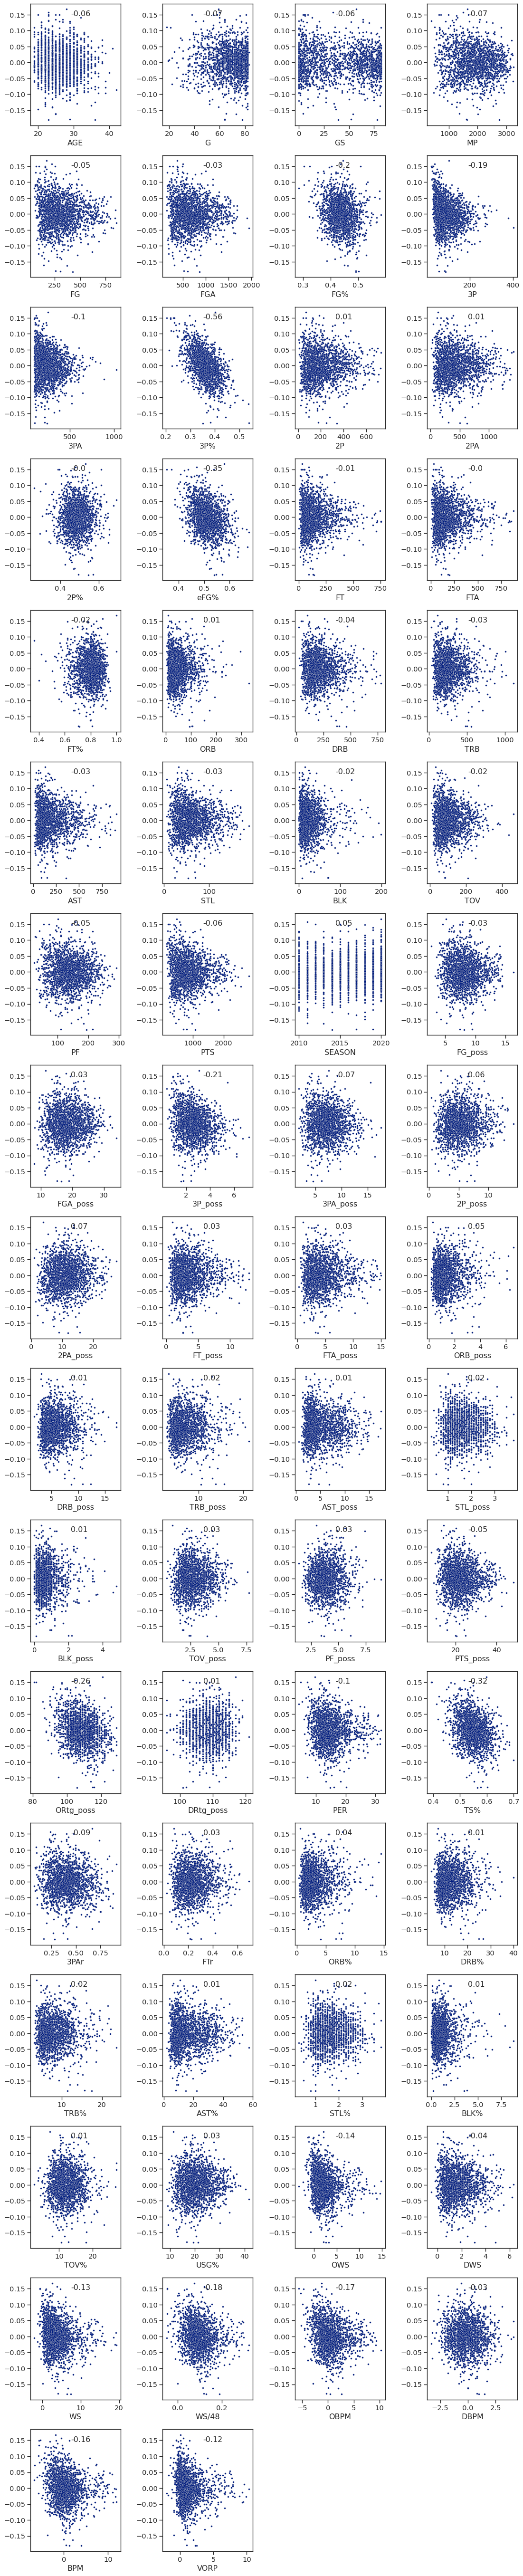

ORtg_poss: -0.26
3P%: -0.56
3P_poss: -0.21
eFG%: -0.35
TS%: -0.32


In [14]:
# plot against next seasons percentage

fig, axs = plt.subplots(17,4, figsize=(14, 68), dpi=80)

cors = list()
cols = list()

for i, col in enumerate(df.columns):

    x_i = i % 4
    y_i = int(i/4)

    x = df[col][np.isfinite(df[col])]
    y = df['3pt_dif'][np.isfinite(df[col])]


    R = pearsonr(x, y)[0]
    cor = round(R, 2)

    if i < 5 and col!='3pt_dif' and col!='next_3P%':
        cors.append(cor)
        cols.append(col)
    
    
    elif col!='3pt_dif' and col!='next_3P%':
        val = min(np.abs(cors))

        if abs(cor) > val:
            ind = list(np.abs(cors)).index(val)
            cors[ind] = cor
            cols[ind] = col

    sns.scatterplot(ax=axs[y_i,x_i], data=df, x=col,y='3pt_dif',edgecolor="lightgrey", s=10)
    axs[y_i,x_i].set_xlabel(col);axs[y_i,x_i].set_ylabel('')
    axs[y_i,x_i].text(0.45, 0.9, cor, transform=axs[y_i,x_i].transAxes)

fig.delaxes(axs.flatten()[66])
fig.delaxes(axs.flatten()[67])
fig.tight_layout()    
fig.tight_layout()
plt.show()

for i in range(len(cols)):
    print('%s: %s' % (cols[i], cors[i]))


Plot correlations between features

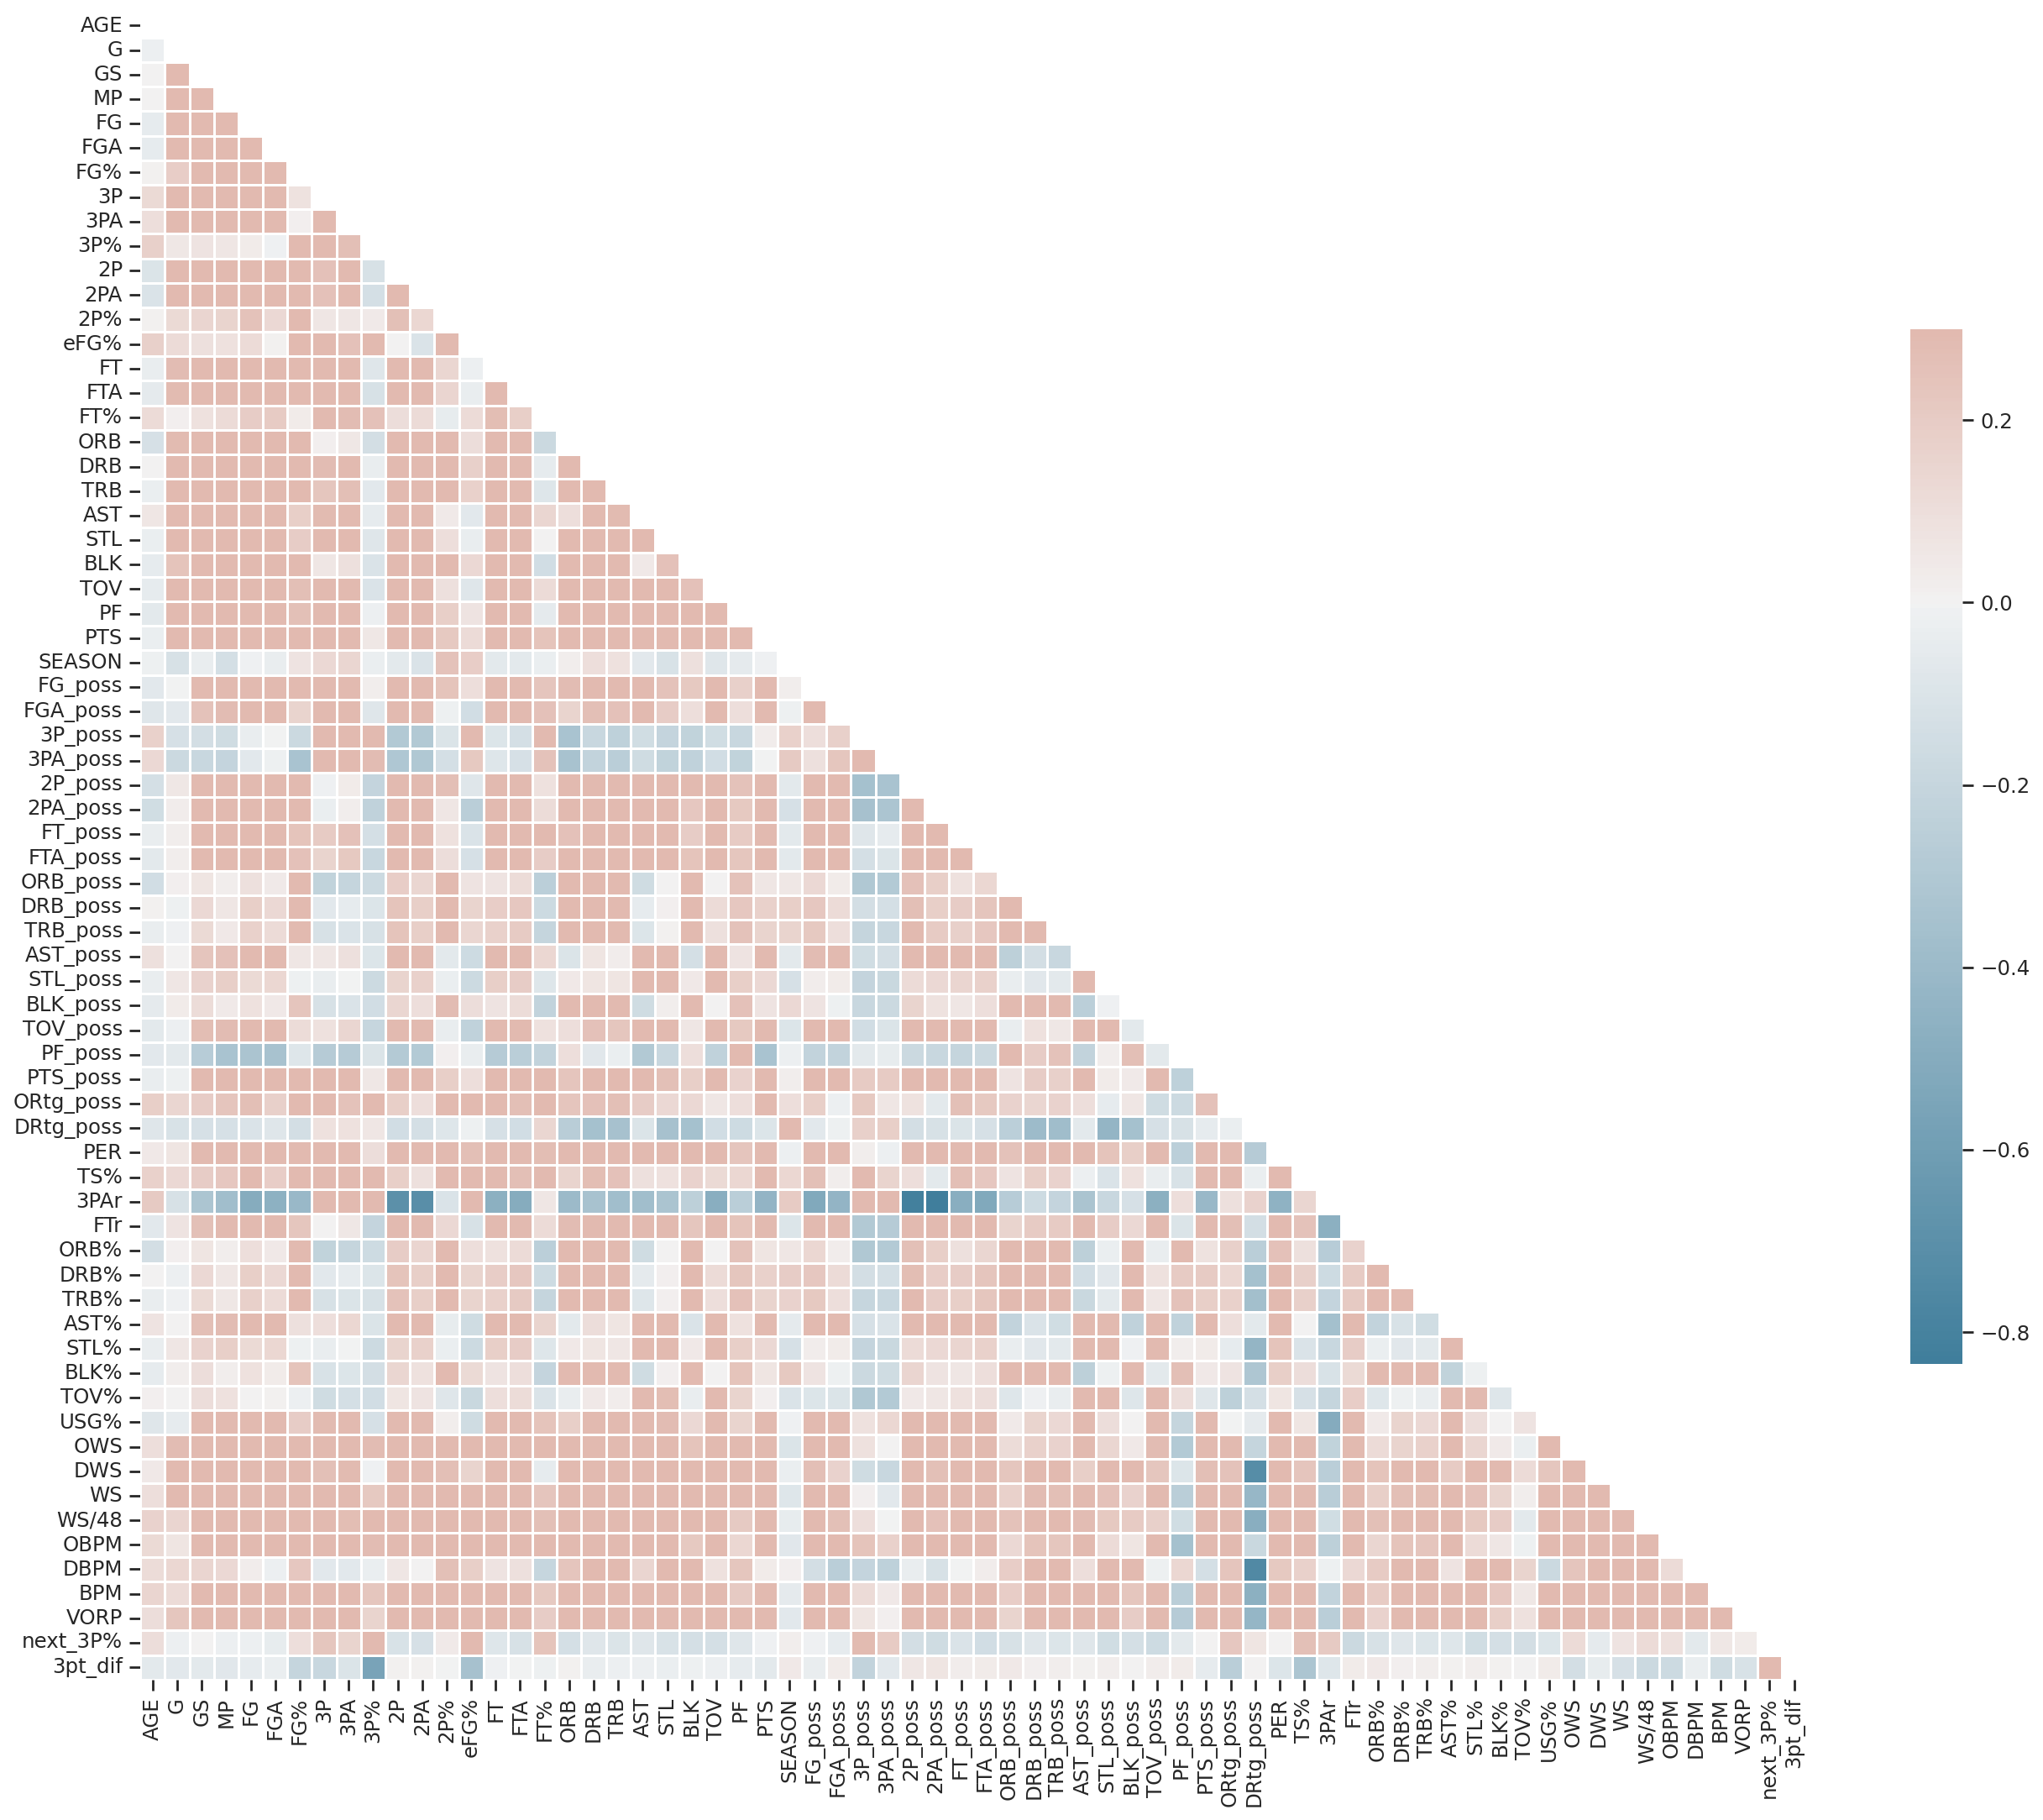

In [20]:
sns.set(font_scale=1.0)
sns.set_style('ticks')
corr_f = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_f, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 20), dpi=160)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_f, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Save transformed data

In [26]:
df_trans['next_3P%'] = df['next_3P%']
df_trans['3pt_dif'] = df['3pt_dif'] 

df_trans = df_trans.join(df_char)
df_trans = df_trans.join(df_not_trans)
df_trans.to_csv("~/GitHub/3pt-shooting/data/transformed.csv", index=False)